# Los glaciares como recursos hídricos: parte 1 (clima idealizado)

Nuestros cuadernos anteriores mostraron cómo usar OGGM para responder preguntas teóricas sobre los glaciares, usando experimentos idealizados: el efecto de una pendiente diferente, el concepto de altitud de la línea de equilibrio, el gradiente de balance de masa, etc. Ahora, ¿cómo usamos OGGM para explorar glaciares reales? Este cuaderno nos da una idea.

Objetivos de este cuaderno:
- preparar una carrera modelo para un glaciar del mundo real
- ejecutar simulaciones utilizando diferentes escenarios climáticos idealizados para explorar el papel de los glaciares como recursos hídricos
- comprender el concepto de "pico de agua"

## Preparando el escenario: la escorrentía de los glaciares y el "pico de agua"

*"Si los glaciares se derriten, ya no habrá agua en la montaña".*

Esta es una frase que escuchamos a menudo de personas que conocemos, o a veces incluso en artículos de noticias. De hecho, el papel de los glaciares en el ciclo hidrológico es más complejo que eso. En este cuaderno, exploraremos esta pregunta utilizando escenarios climáticos idealizados aplicados a glaciares reales.

Antes de continuar, echemos un vistazo a la contribución esperada de los glaciares al caudal local. El siguiente gráfico muestra un escenario idealizado donde el clima es primero constante (t$_0$-t$_1$, y el glaciar está en equilibrio con su clima) y luego ocurre un calentamiento (t$_1$-t$_2$) . Este gráfico presenta algunos puntos muy importantes, que exploraremos juntos en este cuaderno.
1. Cuando un glaciar está en equilibrio, no contribuye en absoluto a la escorrentía anual.
2. Cuando el clima se calienta, los glaciares pierden masa. Esta agua contribuye a la escorrentía río abajo, y la escorrentía aumenta.
3. Si el clima se calienta aún más, los glaciares seguirán perdiendo masa y se volverán significativamente más pequeños. Cuando no quede mucho hielo por derretir cada año (o cuando el clima se estabilice), su contribución será menor hasta volver a ser cero.
4. En el nuevo equilibrio, la escorrentía anual es la misma que antes, pero la contribución estacional cambió.
¡Ahora volveremos a todos estos puntos juntos, usando OGGM!
<img src="https://raw.githubusercontent.com/OGGM/oggm-edu/master/docs/_static/fig_huss_hock.jpg" width="700px" alt="Figura 1 de https://www.nature. com/articulos/s41558-017-0049-x">
*Gráfico de [Huss & Hock (2018)](https://www.nature.com/articles/s41558-017-0049-x)*

## Configuración

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
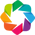

In [4]:
# One interactive plot below requires Bokeh
# The rest of the notebook works without this dependency
import holoviews as hv
hv.extension('bokeh')
import geoviews as gv
import geoviews.tile_sources as gts

In [5]:
# Temporarily ignore warnings from shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings('ignore', category=ShapelyDeprecationWarning)

In [6]:
import xarray as xr
import salem
import numpy as np
import pandas as pd

In [7]:
import oggm.cfg
from oggm import utils, workflow, tasks, graphics
from oggm_edu.legacy import run_constant_climate_with_bias

In [ ]:
# OGGM options
oggm.cfg.initialize(logging_level='WARNING')
oggm.cfg.PATHS['working_dir'] = utils.gettempdir(dirname='WaterResources')
oggm.cfg.PARAMS['min_ice_thick_for_length'] = 1  # a glacier is when ice thicker than 1m
oggm.cfg.PARAMS['store_model_geometry'] = True

### Definir el glaciar con el que jugaremos

Para este cuaderno usamos Hintereisferner, Austria. Algunas otras posibilidades para jugar:
-Hintereisferner, Austria: RGI60-11.00897
- Artesonraju, Peru: RGI60-16.02444
-Rikha Samba, Nepal: RGI60-15.04847
-Parlung No. 94, China: RGI60-15.11693
Y prácticamente cualquier glaciar en el que pueda encontrar el RGI Id, p. en el [GLIMS viewer](https://www.glims.org/maps/glims)! Sin embargo, los grandes glaciares pueden necesitar simulaciones más largas para ver los cambios. Para parámetros de calibración menos inciertos, también recomendamos elegir uno de los muchos glaciares de referencia [GLIMS viewer](https://www.glims.org/maps/glims), donde nos aseguramos de que las observaciones del balance de masa coincidan mejor.
Comencemos primero con Hintereisferner y al final de este cuaderno se le invitará a probar su glaciar favorito.

In [ ]:
# Hintereisferner
rgi_id = 'RGI60-11.00897'

## Preparando los datos del glaciar

Esto puede tardar unos minutos en la primera llamada debido a la descarga de los datos necesarios:

In [ ]:
# We pick the elevation-bands glaciers because they run a bit faster - but they create more step changes in the area outputs
base_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.4/L3-L5_files/CRU/elev_bands/qc3/pcp2.5/no_match'
gdir = workflow.init_glacier_directories([rgi_id], from_prepro_level=5, prepro_border=80, prepro_base_url=base_url)[0]

## Mapa glaciar interactivo

Un primer vistazo al glaciar de interés.
*Sugerencia: puede usar el mouse para desplazarse y hacer zoom en el mapa*

In [ ]:
sh = salem.transform_geopandas(gdir.read_shapefile('outlines'))
(gv.Polygons(sh).opts(fill_color=None, color_index=None) *
 gts.tile_sources['EsriImagery'] * gts.tile_sources['StamenLabels']).opts(width=800, height=500, active_tools=['pan', 'wheel_zoom'])

Para OGGM, los glaciares tienen una dimensión de "1,5" a lo largo de su línea de flujo:

In [ ]:
fls = gdir.read_pickle('model_flowlines')
graphics.plot_modeloutput_section(fls);

## Generando un glaciar en equilibrio con el clima

Preparemos una ejecución con las tareas `run_constant_climate_with_bias` del paquete `oggm_edu`. Nos permite ejecutar escenarios idealizados de corrección de temperatura y precipitación de una manera fácil.
Primero, decidamos una evolución de la temperatura:

In [ ]:
years = np.arange(400)
temp_bias_ts = pd.Series(years * 0. - 2, index=years)
temp_bias_ts.plot(); plt.xlabel('Year'); plt.ylabel('Temperature bias (°C)');

¡No hay mucho que ver aqui! La variable `temp_bias_ts` describe un sesgo de temperatura que se aplicará al clima estándar (ver más abajo).
Aquí, el sesgo es de -2 ° todo el tiempo porque queremos ejecutar una carrera llamada "spin-up", para permitir que el glaciar crezca y asegurarnos de que nuestro glaciar esté en equilibrio dinámico con su clima al final de la simulación. Vamos:

In [ ]:
# file identifier where the model output is saved
file_id = '_spinup'

# We are using the task run_with_hydro to store hydrological outputs along with the usual glaciological outputs
tasks.run_with_hydro(gdir,  # Run on the selected glacier
                     temp_bias_ts=temp_bias_ts,  # the temperature bias to apply to the average climate
                     run_task=run_constant_climate_with_bias,  # which climate scenario? See following notebook for other examples
                     y0=2009, halfsize=10,  # Period which we will average and constantly repeat
                     store_monthly_hydro=True,  # Monthly ouptuts provide additional information
                     output_filesuffix=file_id);  # an identifier for the output file, to read it later

Bien, hay bastante material nuevo en la celda de arriba. Centrémonos en los puntos más importantes:
- ejecutamos el modelo durante 400 años (según lo definido por nuestra serie temporal de temperatura de control)
- el modelo se ejecuta con un clima constante promediado durante 21 años (2 veces `halfsize` + 1) para el período 1999-2019
- aplicamos una polarización en frío de -2°C. De hecho, Hintereisferner está en fuerte desequilibrio con el clima actual y se necesita tal sesgo para que el glaciar crezca (más sobre esto más adelante)

Ahora echemos un vistazo a la salida ahora:

In [ ]:
with xr.open_dataset(gdir.get_filepath('model_diagnostics', filesuffix=file_id)) as ds:
    # The last step of hydrological output is NaN (we can't compute it for this year)
    ds = ds.isel(time=slice(0, -1)).load()

¡Hay muchas variables en este conjunto de datos! Podemos enumerarlos con:

In [ ]:
ds

*Consejo: puede hacer clic en una variable y mostrar su atributo con el botón "página" a la derecha.*
Las variables `time` y `month_2d` son coordenadas, y las otras variables se proporcionan como información adicional (por ejemplo, `calendar_month`, volveremos a esto), o proporcionan los datos reales. Por ejemplo, podemos trazar la evolución anual del volumen y longitud de nuestro glaciar:

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 7), sharex=True)
ds.volume_m3.plot(ax=axs[0]);
ds.length_m.plot(ax=axs[1]);
axs[0].set_xlabel(''); axs[0].set_title(f'{rgi_id}'); axs[1].set_xlabel('Years');

El glaciar crece y casi duplica su volumen. Después de 400 años, está en equilibrio.
Esta simulación de rotación no se analizará más: saltemos al corazón del tema: **¿qué sucede con la escorrentía de los glaciares cuando el clima se está calentando**?

## Simulación de cambio climático

Comenzamos generando un escenario de cambio de temperatura. Definimos un período corto de temperatura constante (a -2°C, para ser coherentes con lo anterior), seguido de un aumento lineal (2,5 grados en unos 150 años) y una estabilización:

In [ ]:
ny_s = 50  # Start
ny_t = 150  # Trend
ny_e = 102  # Stabilisation
temp_bias_ts = np.concatenate([np.full(ny_s, -2.), np.linspace(-2, 0.5, ny_t), np.full(ny_e, 0.5)])
temp_bias_ts = pd.Series(temp_bias_ts, index=np.arange(ny_s + ny_t + ny_e))
temp_bias_ts.plot(); plt.xlabel('Year'); plt.ylabel('Temperature bias (°C)');

In [ ]:
# file identifier where the model output is saved
file_id = '_lin_temp'

# We are using the task run_with_hydro to store hydrological outputs along with the usual glaciological outputs
tasks.run_with_hydro(gdir,
                     temp_bias_ts=temp_bias_ts,  # the temperature bias timeseries we just created
                     run_task=run_constant_climate_with_bias,  # which climate scenario? See following notebook for other examples
                     y0=2009, halfsize=10,  # Period which we will average and constantly repeat
                     store_monthly_hydro=True,  # Monthly ouptuts provide additional information
                     init_model_filesuffix='_spinup',  # We want to start from the glacier in equibrium we created earlier
                     output_filesuffix=file_id);  # an identifier for the output file, to read it later

Echemos un vistazo a la evolución de nuestro glaciar:

In [ ]:
with xr.open_dataset(gdir.get_filepath('model_diagnostics', filesuffix=file_id)) as ds:
    # The last step of hydrological output is NaN (we can't compute it for this year)
    ds = ds.isel(time=slice(0, -1)).load()

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 7), sharex=True)
ds.volume_m3.plot(ax=axs[0]);
ds.length_m.plot(ax=axs[1]);
temp_bias_ts.plot(ax=axs[2], c='C3');
axs[0].set_xlabel(''); axs[0].set_title(f'{rgi_id}'); axs[1].set_xlabel(''); axs[2].set_xlabel('Years'); axs[2].set_ylabel('Temperature bias (°C)');

En este escenario, el glaciar se derretiría casi por completo (pierde alrededor del 90% de su volumen). Tenga en cuenta también que el glaciar continúa ajustándose después de que la temperatura se ha estabilizado. **¿Cuáles son las implicaciones para la escorrentía río abajo?**

### escurrimiento anual

A medida que los glaciares retroceden, contribuyen al aumento del nivel del mar (¡visite la aplicación [World Glaciers Explorer](https://edu.oggm.org/en/latest/explorer.html) OGGM-Edu para obtener más información!). Esto no es lo que nos interesa aquí. De hecho, también tendrán impactos locales importantes: en este cuaderno, veremos su impacto en el flujo de agua.
Echemos un vistazo a algunos de los resultados hidrológicos calculados por OGGM. Comenzamos creando un marco de datos de pandas de todas las variables "1D" (anuales) en el conjunto de datos de salida:

In [ ]:
sel_vars = [v for v in ds.variables if 'month_2d' not in ds[v].dims]
df_annual = ds[sel_vars].to_dataframe()

Luego podemos seleccionar las variables hidrológicas y sumarlas para obtener la escorrentía total anual:

In [ ]:
# Select only the runoff variables
runoff_vars = ['melt_off_glacier', 'melt_on_glacier', 'liq_prcp_off_glacier', 'liq_prcp_on_glacier']
# Convert them to megatonnes (instead of kg)
df_runoff = df_annual[runoff_vars] * 1e-9
# We smooth the output, which is otherwize noisy because of area discretization
df_runoff = df_runoff.rolling(31, center=True, min_periods=1).mean()
fig, ax = plt.subplots(figsize=(10, 3.5), sharex=True)
df_runoff.sum(axis=1).plot(ax=ax);
plt.ylabel('Runoff (Mt)'); plt.xlabel('Years'); plt.title(f'Total annual runoff for {rgi_id}');

Las variables hidrológicas se calculan sobre la mayor área posible cubierta por hielo glaciar durante la simulación. Esto es equivalente a la escorrentía que se mediría en una estación hidrológica de calibre fijo en el extremo del glaciar.
La escorrentía total anual consta de los siguientes componentes:
- fusión fuera del glaciar: la nieve se derrite en áreas que ahora están libres de glaciares (es decir, 0 en el año de mayor extensión del glaciar, en este ejemplo al comienzo de la simulación)
- derretimiento en el glaciar: hielo + nieve estacional derretida en el glaciar
- precipitación líquida dentro y fuera del glaciar (esta última siendo cero en el año de mayor extensión glacial, en este ejemplo al comienzo de la simulación)

In [ ]:
f, ax = plt.subplots(figsize=(10, 6));
df_runoff.plot.area(ax=ax, color=sns.color_palette('rocket')); plt.xlabel('Years'); plt.ylabel('Runoff (Mt)'); plt.title(rgi_id);

La longitud y el volumen del glaciar disminuyen desde el año 50 en adelante hasta aproximadamente el año 250; esta es la fase de **retroceso del glaciar**. Posteriormente, la longitud y el volumen se estabilizan en un valor constante, lo que indica que el glaciar ha **alcanzado el equilibrio**.
Ahora estudie el gráfico anterior y sus cuatro componentes principales.
**Preguntas a abordar:**
- ¿Cuándo se alcanza el "pico de agua"? ¿Tiene esto algo que ver con un cambio en la tendencia de la temperatura en sí? Si no, ¿cuál es la razón por la que se produce el "pico de agua"?
- Verifique que la escorrentía total de calibre fijo (¿recuerda lo que esto significa?) sea la misma al principio y al final de la simulación. ¿Por qué es así? ¿Qué cambió en el medio?
- La temperatura se estabiliza en el año 200, pero todas las variables hidrológicas continúan cambiando después de eso. ¿Lo que está sucediendo allí?
- ¿Cuál es la contribución de la precipitación líquida al principio y al final de la simulación? ¿Qué cambió?
- ¿Puede verificar que la contribución neta del glaciar a la escorrentía (es decir, - $\Delta M / \Delta t$ es cero al principio y al final de la simulación y positiva en el medio? ¿Por qué esperamos este comportamiento?
*Sugerencia: compare los resultados con el gráfico de escorrentía idealizado que presentamos al principio de este capítulo*

In [ ]:
# Solution of the last question above
glacier_mass = ds.volume_m3.to_series() * oggm.cfg.PARAMS['ice_density'] * 1e-9  # In Megatonnes, Mt
glacier_mass = glacier_mass.rolling(31, center=True, min_periods=1).mean()
(- glacier_mass.diff()).plot()
plt.axhline(y=0, color='k', ls=':')
plt.ylabel('Annual glacier mass change (Mt yr$^{-1}$)')
plt.xlabel('Years'); plt.title('Glacier contribution to annual runoff');

### escorrentía mensual

Las variables "2D" contienen los mismos datos hidrológicos, pero con resolución mensual (dimensiones [time, month]). Por ejemplo, la escorrentía mensual se puede calcular como:

In [ ]:
# Select only the runoff variables and convert them to megatonnes (instead of kg)
monthly_runoff = ds['melt_off_glacier_monthly'] + ds['melt_on_glacier_monthly'] + ds['liq_prcp_off_glacier_monthly'] + ds['liq_prcp_on_glacier_monthly']
monthly_runoff = monthly_runoff.rolling(time=31, center=True, min_periods=1).mean() * 1e-9
monthly_runoff.clip(0).plot(cmap='Blues', cbar_kwargs={'label': 'Runoff (Mt)'}); plt.xlabel('Months'); plt.ylabel('Years');

Pero tenga en cuenta, algo está un poco mal con esta trama (algunos de ustedes pueden haber notado: el derretimiento máximo ocurre en otoño, lo cual es inusual): eso se debe a que las coordenadas OGGM son meses hidrológicos; mejoremos esto:

In [ ]:
# This should work in both hemispheres maybe?
ds_roll = ds.roll(month_2d=ds['calendar_month_2d'].data[0] - 1, roll_coords=True)
ds_roll['month_2d'] = ds_roll['calendar_month_2d']

# Select only the runoff variables and convert them to megatonnes (instead of kg)
monthly_runoff = ds_roll['melt_off_glacier_monthly'] + ds_roll['melt_on_glacier_monthly'] + ds_roll['liq_prcp_off_glacier_monthly'] + ds_roll['liq_prcp_on_glacier_monthly']
monthly_runoff = monthly_runoff.rolling(time=31, center=True, min_periods=1).mean() * 1e-9
monthly_runoff.clip(0).plot(cmap='Blues', cbar_kwargs={'label': 'Runoff (Mt)'}); plt.xlabel('Months'); plt.ylabel('Years');

Como podemos ver, la escorrentía es aproximadamente cero durante los meses de invierno, mientras que es relativamente alta durante los meses de verano.
Ahora comparemos la escorrentía real con la precipitación total sobre la cuenca:

In [ ]:
# Compute total precipitation (Snow + Liquid)
tot_precip = ds_roll['liq_prcp_off_glacier_monthly'] + ds_roll['liq_prcp_on_glacier_monthly'] + ds_roll['snowfall_off_glacier_monthly'] + ds_roll['snowfall_on_glacier_monthly']
tot_precip *= 1e-9  # in Mt

In [ ]:
# Plot these data at year 0
yr = 0
r = monthly_runoff.sel(time=yr)
p = tot_precip.sel(time=yr)

f, ax = plt.subplots(figsize=(10, 6));
r.plot(ax=ax, color='C3', label='Monthly runoff', linewidth=3);
p.plot(ax=ax, color='C0', label='Monthly precipitation', linewidth=3);
ax.fill_between(r.month_2d, r, p, where=(p >= r), facecolor='C0', interpolate=True, alpha=0.5)
ax.fill_between(r.month_2d, r, p, where=(r > p), facecolor='C3', interpolate=True, alpha=0.5)
plt.ylabel('Mt yr$^{-1}$'); plt.legend(loc='best');
plt.xlabel('Month'); plt.title(f'Total monthly runoff and precipitation at year {yr}');

Al comienzo de la simulación, el glaciar está en equilibrio y su contribución anual a la escorrentía es cero. De hecho, esto significa que el área azul en el gráfico de arriba es igual al área roja: **la cuenca glaciada libera agua durante el verano, que se acumula en forma de nieve en los meses de invierno**.
En esta región (Alpes Ötztal, Austria), las precipitaciones son relativamente constantes durante todo el año. **Discutir cuáles podrían ser las implicaciones en otros climas del mundo, en particular en climas con una fuerte estacionalidad de las precipitaciones.**

Ahora echemos un vistazo al cambio estacional en la escorrentía con el tiempo:

In [ ]:
f, ax = plt.subplots(figsize=(10, 6));
cmap = sns.color_palette('magma', 3)
for i, yr in enumerate([0, 120, 300]):
    monthly_runoff.sel(time=yr).plot(ax=ax, color=cmap[i], label=f'Year {yr}')
plt.ylabel('Mt yr$^{-1}$'); plt.legend(loc='best');
plt.xlabel('Month'); plt.title('Total monthly runoff change with time');

**Preguntas para explorar:**
- verifique que la escorrentía anual sea la misma en el año 0 que en el año 300. ¿Qué cambió en el medio?
- ¿Cuál es el responsable del cambio de derretimiento de verano a derretimiento de primavera?
- ¿Cómo cambia la escorrentía en el "pico de agua" (aprox. año 120)?
- discutir las implicaciones de este cambio en la estacionalidad para Hintereisferner y para otras regiones del mundo.
**Ahora repite este cuaderno (idealmente copiándolo primero) con otras regiones del mundo, donde el clima puede ser muy diferente. **
Tenga en cuenta que nuestras explicaciones son muy específicas del glaciar. Entonces, si cambia el glaciar usando otro rgi_id, ¡es posible que también deba adaptar las explicaciones!
**¡También puedes cambiar los parámetros de las simulaciones!**
¿Qué sucede cuando el cambio de temperatura es más grande/más rápido, más pequeño/más lento? ¿Cuáles son las implicaciones para el "pico de agua"?

## Terminando

Ahora concluyamos este cuaderno reproduciendo la famosa trama de [Huss & Hock (2018)](https://www.nature.com/articles/s41558-017-0049-x) con nuestros datos.
<img src="https://raw.githubusercontent.com/OGGM/oggm-edu/master/docs/_static/fig_huss_hock.jpg" width="700px" alt="Figura 1 de https://www.nature. com/articulos/s41558-017-0049-x">
*Gráfico de [Huss & Hock (2018)](https://www.nature.com/articles/s41558-017-0049-x)*

In [ ]:
# Make a dataframe out of the xarray dataset for simplicity
df_monthly_runoff = pd.DataFrame(monthly_runoff.data, index=ds.time, columns=monthly_runoff.month_2d)

# Create new columns for each season (we define seasons from the perspective of the northern Hemisphere)
df_monthly_runoff['Spring (Apr-Jun)'] = df_monthly_runoff[[4, 5, 6]].sum(axis=1)
df_monthly_runoff['Summer (Jul-Sep)'] = df_monthly_runoff[[7, 8, 9]].sum(axis=1)
df_monthly_runoff['Winter (Oct-Mar)'] = df_monthly_runoff[[10, 11, 12, 1, 2, 3]].sum(axis=1)
df_monthly_runoff.columns.name = 'Season'

# Plot it
# Attention the seasons and labels might need to be adapted if a glacier in a different region is used!
f, ax = plt.subplots(figsize=(10, 6));
df_monthly_runoff[['Spring (Apr-Jun)', 'Summer (Jul-Sep)', 'Winter (Oct-Mar)']].plot.area(ax=ax, color=sns.color_palette('rocket'));
plt.xlabel('Years'); plt.ylabel('Runoff (Mt)'); plt.title('Runoff by season');

Y ahora la trama real:

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]}, figsize=(10, 8), sharex=True)

p1 = df_monthly_runoff[['Spring (Apr-Jun)', 'Summer (Jul-Sep)', 'Winter (Oct-Mar)']].sum(axis=1)
p2 = df_monthly_runoff['Summer (Jul-Sep)'] # July to September is here the melt season
p1.plot(ax=ax1, color='C0', label='Annual runoff', linewidth=3)
p2.plot(ax=ax1, color='C3', label='Melt-season runoff', linewidth=3);
ax1.hlines([p1.loc[0], p2.loc[0]], 0, 300, color=['C0', 'C3'], linestyle=[':']);
ax1.legend(); ax1.set_xlabel(''); ax1.set_ylabel('Runoff (Mt)');

(temp_bias_ts + 2).plot(ax=ax2, color='C2', label='Temperature', linewidth=3);
ax2.legend(loc='lower right'); ax2.set_xlabel('Years'); ax2.set_ylabel('$\Delta T (°C)$');
sns.despine();

Tenga en cuenta que las dos gráficas anteriores son muy específicas del glaciar. Si usa un glaciar con otro clima, es posible que deba adaptar las gráficas, porque siempre estamos interesados ​​en aquellos meses en los que la escorrentía del glaciar contribuye más a la escorrentía total. Ejemplo dado, para Artesonraju en Perú, estamos más interesados ​​en junio, julio, agosto y septiembre ya que esta es la estación seca, donde casi no llueve.

## Llévate puntos a casa

- Los glaciares en equilibrio *no* son recursos hídricos netos: ganan tanta masa como liberan
- Sin embargo, tienen un papel amortiguador estacional, liberando agua durante los meses de deshielo.
- Cuando los glaciares se derriten, se convierten en recursos hídricos netos. El "pico de agua" es el momento en el que el suministro de deshielo de los glaciares alcanza su máximo, es decir, cuando se produce la máxima escorrentía.

## Referencias

- Huss, M. y Hock, R.: Respuesta hidrológica a escala mundial a la futura pérdida de masa de los glaciares, Nat. Clima Chang., 8(2), 135–140, [doi:10.1038/s41558-017-0049-x](https://doi.org/10.1038/s41558-017-0049-x), 2018.
- Un [recent blog post](https://blogs.egu.eu/divisions/cr/2021/03/05/glaciers-water-supply-climate-change/) sobre el papel de los glaciares en el ciclo hidrológico

## ¿Que sigue?

xx_markdown_enlace_xx